In [2]:
import requests
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
plt.rcParams['axes.facecolor'] = '#FFCCCB'

link = "https://www.eu-startups.com/directory"
html = requests.get(link).text
soup = BeautifulSoup(html)
extracted = soup.find("div", id="wpbdp-categories")

lists = extracted.find_all("li")
countries = [l.text.strip().split() for l in lists if l != None]
countries = [[k, int(v[1:-1])]for k,v in countries]
countries = dict(countries)
countries = dict(sorted(countries.items()))

def viz(startup_index, top=40, step=30):
    plt.yticks(np.arange(0, 15, step=1))
    # values -> werte
    # landern -> countries
    labels = list(startup_index.keys())
    values = list(startup_index.values())

    values = np.array(values)
    labels = np.array(labels)
    idx = np.argsort(values)
    labels = labels[idx]
    values = values[idx]

    plt.bar(labels, values)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title('Histogram of Data')
    plt.xticks(rotation = 80)
    plt.grid(True)
    plt.show()

# Country population

https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population

In [3]:
population_by_country = {
    'Austria': 9006400,
    'Belgium': 11589600,
    'Bulgaria': 6934900,
    'Croatia': 4105300,
    'Cyprus': 1207300,
    'Czechia': 10708900,
    'Denmark': 5831400,
    'Estonia': 1331000,
    'Finland': 5540700,
    'France': 67391600,
    'Germany': 83783900,
    'Greece': 10423100,
    'Hungary': 9660300,
    'Ireland': 5026600,
    'Italy': 59554000,
    'Latvia': 1901500,
    'Lithuania': 2794700,
    'Luxembourg': 632300,
    'Malta': 516100,
    'Netherlands': 17441200,
    'Norway': 5421200,
    'Poland': 37846600,
    'Portugal': 10196700,
    'Romania': 19237700,
    'Slovakia': 5459600,
    'Slovenia': 2100100,
    'Spain': 47351600,
    'Sweden': 10452300,
    'Switzerland': 8654600,
    'UK': 67215300
}

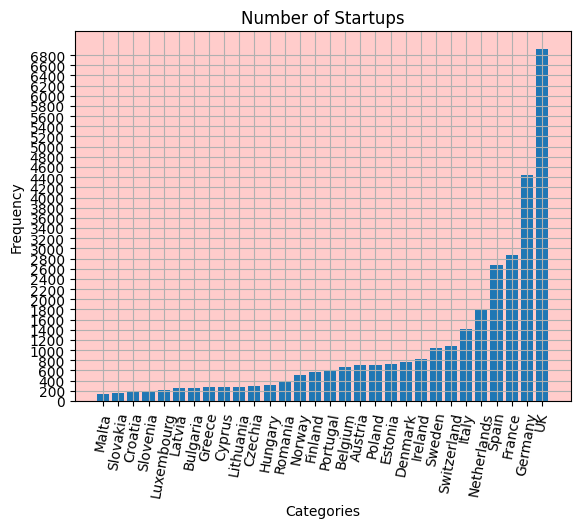

In [4]:
plt.yticks(np.arange(0, 6900, step=200))
labels = list(countries.keys())
values = list(countries.values())

values = np.array(values)
labels = np.array(labels)
idx = np.argsort(values)
labels = labels[idx]
values = values[idx]

plt.bar(labels, values, width=0.8)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Number of Startups')
plt.xticks(rotation = 80)
plt.grid(True)
plt.show()


### Startups / Population size

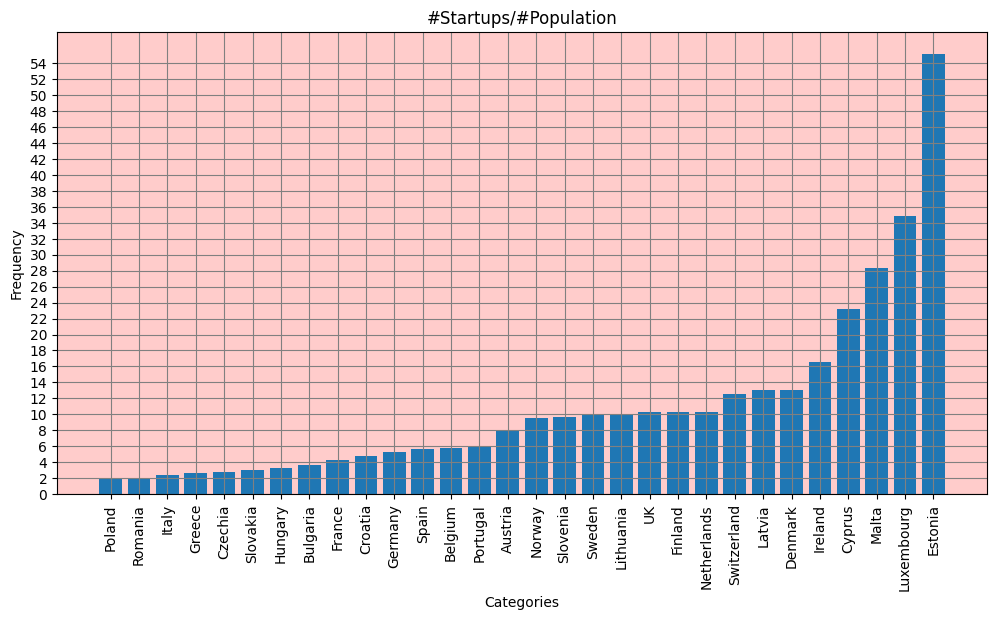

In [5]:
k = 3
plt.figure(figsize=(4*k, 2*k))
POPULATION_SIZE = 100000
startup_index = {k:countries[k]/population_by_country[k]*POPULATION_SIZE for k in population_by_country.keys()}
plt.yticks(np.arange(0, max(startup_index.values()), step=2))
labels = np.array(list(startup_index.keys()))
values = np.array(list(startup_index.values()))

idx = np.argsort(values)
labels = labels[idx]
values = values[idx]

plt.bar(labels, values)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('#Startups/#Population')
plt.xticks(rotation = 90)
plt.grid(True, color="gray")
plt.show()

# Startups / working capable 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

link = "https://www.eu-startups.com/directory"
html = requests.get(link).text
soup = BeautifulSoup(html)
extracted = soup.find("div", id="wpbdp-categories")

lists = extracted.find_all("li")
startups = [l.text.strip().split() for l in lists if l != None]
startups = [[k, int(v[1:-1])]for k,v in startups]
startups = dict(startups)
startups = dict(sorted(startups.items()))


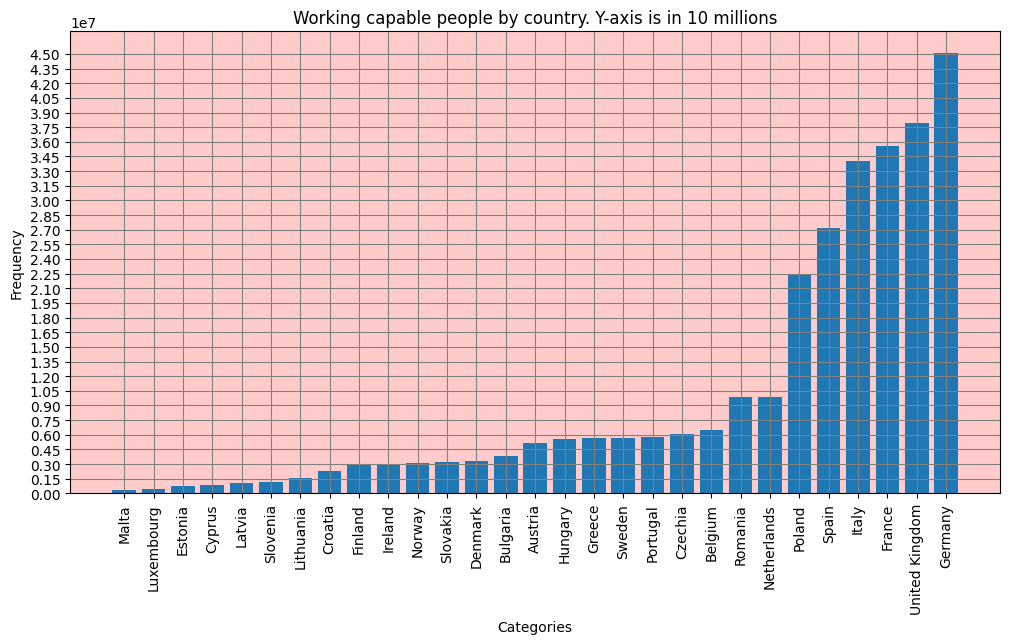

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
plt.rcParams['axes.facecolor'] = '#FFCCCB'

data = pd.read_excel("population.xlsx")
data["Population"] = data["Population"].map(lambda x : x.replace(",","") if type(x) == str else int(x))
data["Population"] = data["Population"].astype(int)
data = data[(data["% of Females"] != 100)][["Country","Age", "Population"]]
data["Age"] = data["Age"].map(lambda x : x.replace("+", "") if type(x) == str else int(x))
data["Age"] = data["Age"].astype(int)
data = data[(data["Age"] >= 18) & (data["Age"] <= 60)]
working_capable = data.groupby(["Country"]).sum().reset_index()[["Country", "Population"]]
working_capable = working_capable[working_capable["Country"] != "United States"]

labels, values = working_capable["Country"], working_capable["Population"]
idx = np.argsort(values)
labels = labels[idx]
values = values[idx]

k = 3
plt.figure(figsize=(4*k, 2*k))
plt.bar(labels, values)
plt.yticks(np.arange(0, working_capable["Population"].max().item(), step=1500000))
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Working capable people by country. Y-axis is in 10 millions')
plt.xticks(rotation = 90)
plt.grid(True, color="gray")
plt.subplots_adjust(hspace=3)  
plt.show()

In [8]:
working_capable = dict(zip(list(working_capable["Country"]), list(working_capable["Population"])))
working_capable["UK"] = working_capable.pop("United Kingdom")

POPULATION_SIZE = 100000
startup_index = {k:round(startups[k]/working_capable[k]*POPULATION_SIZE, 3) for k in working_capable.keys()}
pd.DataFrame.from_dict({k:[v] for k, v in startup_index.items()}).T.reset_index().rename(columns={"index": "Country", 0: "Index"})

,Country,Index
0,Austria,13.716
1,Belgium,10.170
2,Bulgaria,6.478
3,Croatia,8.600
4,Cyprus,34.087
5,Czechia,4.916
6,Denmark,22.974
7,Estonia,99.907
8,Finland,19.404
9,France,8.040


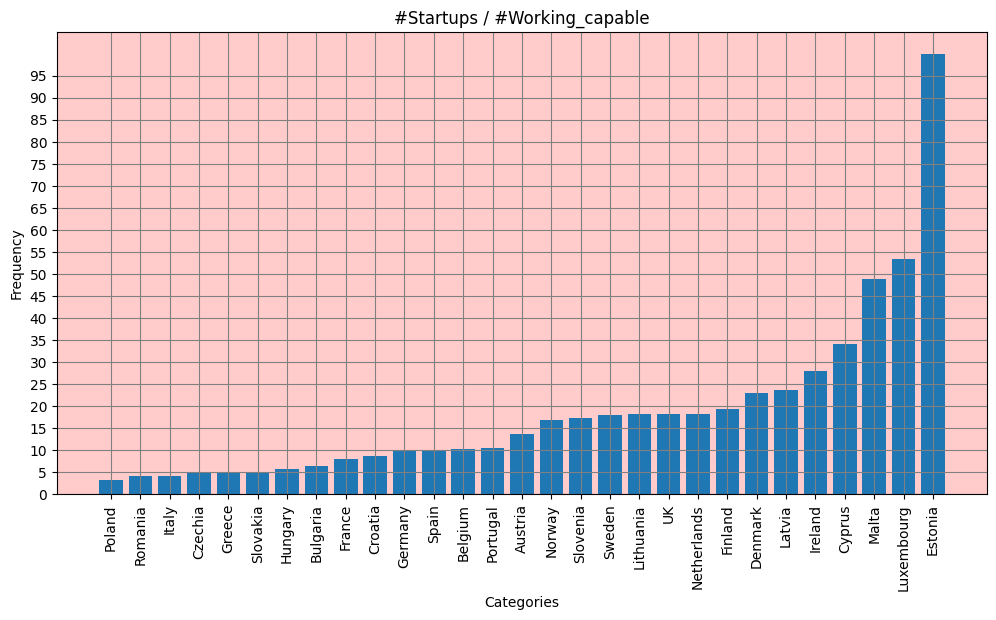

In [9]:
k = 3
plt.figure(figsize=(4*k, 2*k))
plt.yticks(np.arange(0, max(startup_index.values()), step=5))
labels = np.array(list(startup_index.keys()))
values = np.array(list(startup_index.values()))

idx = np.argsort(values)
labels = labels[idx]
values = values[idx]

plt.bar(labels, values)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('#Startups / #Working_capable')
plt.xticks(rotation = 90)
plt.grid(True, color="gray")
plt.show()

# Ordering Chart 


In [59]:
k = 3
plt.figure(figsize=(4*k, 2*k))
POPULATION_SIZE = 100000
startup_index1 = {k:[countries[k]/population_by_country[k]*POPULATION_SIZE] for k in population_by_country.keys()}
df1 = pd.DataFrame.from_dict(startup_index1).T.reset_index().rename(columns={"index": "Country", 0: "Index"})

startup_index2 = {k:round(startups[k]/working_capable[k]*POPULATION_SIZE, 3) for k in working_capable.keys()}
df2 = pd.DataFrame.from_dict({k:[v] for k, v in startup_index2.items()}).T.reset_index().rename(columns={"index": "Country", 0: "Index"})

<Figure size 1200x600 with 0 Axes>

In [60]:
df1 = df1.sort_values("Index").reset_index().rename(columns={"index": "Rank"})
df2 = df2.sort_values("Index").reset_index().rename(columns={"index": "Rank"})
df1.head()

,Rank,Country,Index
0,21,Poland,1.881279
1,23,Romania,2.079251
2,14,Italy,2.381032
3,11,Greece,2.676747
4,5,Czechia,2.792070


In [ ]:
import seaborn as sns
sns.set_theme(style="")
ax = sns.catplot(
    data=df1, kind="bar",
    x="Country", y="Rank"
)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ValueError: style must be one of white, dark, whitegrid, darkgrid, ticks

In [21]:
import requests
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
plt.rcParams['axes.facecolor'] = '#FFCCCB'

link = "https://www.eu-startups.com/directory"
html = requests.get(link).text
soup = BeautifulSoup(html)
extracted = soup.find("div", id="wpbdp-categories")

lists = extracted.find_all("li")
links = [li.a["href"] for li in lists]
links[0]

'https://www.eu-startups.com/directory/wpbdp_category/austrian-startups/'

In [18]:
def mine_starups(link):
    url = f"{link}/page"
    while True:
        i = 1
        try:
            
        except Exception as e:

    for i in range()

'https://www.eu-startups.com/directory/wpbdp_category/austrian-startups/'

In [34]:
import requests
html = requests.get("https://www.eu-startups.com/directory/herzensapp").text
soup = BeautifulSoup(html, "html.parser")
div = soup.find_all("div", class_="td-page-content tagdiv-type")[0]

In [42]:
linkedin_url = div.find("div", class_="social-field linkedin").a["href"]
linkedin_url

'https://www.linkedin.com/company/herzensapp-gmbh/'

In [ ]:
def mine_startup_data(url):


In [ ]:
from linkedin_api import Linkedin

# Authenticate using any Linkedin user account credentials
api = Linkedin('dominikstipic@gmail.com', 'wku4twz3vwsdaf29u8u93NGX-mhd')


In [ ]:
self.session = requests.session()
self.session.proxies.update(proxies)
self.session.headers.update(Client.REQUEST_HEADERS)
self.proxies = proxies
self.logger = logger
self.metadata = {}
self._use_cookie_cache = not refresh_cookies
self._cookie_repository = CookieRepository(cookies_dir=cookies_dir)

logging.basicConfig(level=logging.DEBUG if debug else logging.INFO)